In [2]:
import pandas as pd


def load_results(fold):
    results = pd.read_csv(f"PUMA/predictions/chemical_cv{fold}/2022_01_evaluation_all_data.csv")
    return results

In [3]:
import pandas as pd

df_moshkov = pd.DataFrame()  # Initialize an empty DataFrame

for i in range(5):  # Iterate over range(0, 4)
    df = load_results(i)  # Pass `i` to load_results to load the correct data
    df["Fold"] = i  # Add the current fold as a new column
    df_moshkov = pd.concat([df_moshkov, df], ignore_index=True)  # Concatenate and reset index

# The resulting `df_moshkov` will have combined data from all folds

df_moshkov

,assay_id,auc,descriptor,auc_50,auc_70,auc_90,AP,pr_auc,Fold
0,1_1,0.904762,late_fusion_cs_ge,True,True,True,0.333333,0.166667,0
1,10_19,NaN,late_fusion_cs_ge,NaN,NaN,NaN,NaN,NaN,0
2,10_20,NaN,late_fusion_cs_ge,NaN,NaN,NaN,NaN,NaN,0
3,100_277,0.500000,late_fusion_cs_ge,False,False,False,0.200000,0.100000,0
4,100_278,0.642857,late_fusion_cs_ge,True,False,False,0.416667,0.258333,0
...,...,...,...,...,...,...,...,...,...
18895,9_18,0.000000,mo_es_op,False,False,False,0.226190,0.154762,4
18896,90_256,0.357143,mo_es_op,False,False,False,0.052632,0.026316,4
18897,91_257,1.000000,mo_es_op,True,True,True,1.000000,1.000000,4
18898,92_258,1.000000,mo_es_op,True,True,True,1.000000,1.000000,4


In [4]:
df_moshkov_median = df_moshkov.groupby(["assay_id", "descriptor"]).median().reset_index()
df_moshkov_median

,assay_id,descriptor,auc,AP,pr_auc,Fold
0,100_277,cp_es_op,0.875000,0.833333,0.816667,2.0
1,100_277,cpcl_es_op,0.916667,0.916667,0.902778,2.0
2,100_277,ge_cp_es_op,0.583333,0.666667,0.622222,2.0
3,100_277,ge_es_op,0.777778,0.638889,0.513889,2.0
4,100_277,ge_mobc_cp_es_op,0.666667,0.500000,0.250000,2.0
...,...,...,...,...,...,...
3775,9_18,late_fusion_cs_mobc,0.500000,0.500000,0.250000,2.0
3776,9_18,late_fusion_ge_mobc,0.300000,0.309524,0.196429,2.0
3777,9_18,mo_es_op,0.000000,0.250000,0.154762,2.0
3778,9_18,mobc_cp_es_op,0.200000,0.267857,0.175595,2.0


In [5]:
df_moshkov_median[df_moshkov_median["assay_id"]=="90_256"]

,assay_id,descriptor,auc,AP,pr_auc,Fold
3682,90_256,cp_es_op,0.821429,0.166667,0.083333,2.0
3683,90_256,cpcl_es_op,0.918919,0.250000,0.125000,2.0
3684,90_256,ge_cp_es_op,0.459459,0.055556,0.027778,2.0
3685,90_256,ge_es_op,0.351351,0.047619,0.023810,2.0
3686,90_256,ge_mobc_cp_es_op,0.357143,0.052632,0.026316,2.0
3687,90_256,ge_mobc_es_op,0.675676,0.076923,0.038462,2.0
3688,90_256,ges_es_op,0.480000,0.076923,0.038462,2.0
3689,90_256,late_fusion_cs_ge,0.680000,0.083333,0.041667,2.0
3690,90_256,late_fusion_cs_ge_mobc,0.500000,0.066667,0.033333,2.0
3691,90_256,late_fusion_cs_mobc,0.567568,0.083333,0.041667,2.0


In [6]:
auc_df = pd.read_csv("RF_auc_scores_across_folds.csv")
auc_df["descriptor"] = "cell count"
auc_df = auc_df.rename(columns = {"Task": "assay_id", "AUC_ROC": "auc_cellcount", "AUC_PR":"pr_auc_cellcount"})
auc_df

,Fold,assay_id,auc_cellcount,pr_auc_cellcount,Test_Set_Length,Num_Actives,Num_Inactives,descriptor
0,0,1_1,0.642857,0.111111,22,1,21,cell count
1,0,10_19,NaN,NaN,17,0,17,cell count
2,0,10_20,NaN,NaN,17,0,17,cell count
3,0,100_277,0.687500,0.250000,9,1,8,cell count
4,0,100_278,0.607143,0.325000,9,2,7,cell count
...,...,...,...,...,...,...,...,...
1345,4,9_18,0.400000,0.325000,7,2,5,cell count
1346,4,90_256,0.142857,0.040000,29,1,28,cell count
1347,4,91_257,1.000000,1.000000,5,1,4,cell count
1348,4,92_258,1.000000,1.000000,5,1,4,cell count


In [7]:
df_moshkov_cp = df_moshkov[df_moshkov["descriptor"]=="mobc_es_op"]
df_moshkov_cp = df_moshkov_cp.rename(columns = {"Task": "assay_id", "auc": "auc_mobc", "pr_auc":"pr_auc_mobc"})
df_moshkov_cp

,assay_id,auc_mobc,descriptor,auc_50,auc_70,auc_90,AP,pr_auc_mobc,Fold
3240,1_1,0.809524,mobc_es_op,True,True,False,0.200000,0.100000,0
3241,10_19,NaN,mobc_es_op,NaN,NaN,NaN,NaN,NaN,0
3242,10_20,NaN,mobc_es_op,NaN,NaN,NaN,NaN,NaN,0
3243,100_277,0.875000,mobc_es_op,True,True,False,0.500000,0.250000,0
3244,100_278,0.857143,mobc_es_op,True,True,False,0.583333,0.416667,0
...,...,...,...,...,...,...,...,...,...
18625,9_18,0.200000,mobc_es_op,False,False,False,0.267857,0.175595,4
18626,90_256,0.214286,mobc_es_op,False,False,False,0.043478,0.021739,4
18627,91_257,1.000000,mobc_es_op,True,True,True,1.000000,1.000000,4
18628,92_258,0.250000,mobc_es_op,False,False,False,0.250000,0.125000,4


In [8]:
df = pd.merge(df_moshkov_cp, auc_df, on=["assay_id", "Fold"])
df["baseline_prauc"] = df["Num_Actives"]/(df["Num_Actives"]+df["Num_Inactives"])
df = df.sort_values(["assay_id", "Fold"])
df = df.groupby(["assay_id"]).mean().reset_index()
# Replacing any auc < 0.5 with 0.5
df

,assay_id,auc_mobc,AP,pr_auc_mobc,Fold,auc_cellcount,pr_auc_cellcount,Test_Set_Length,Num_Actives,Num_Inactives,baseline_prauc
0,100_277,0.800000,0.685000,0.584802,2.0,0.814167,0.667778,8.6,1.8,6.8,0.215815
1,100_278,0.765079,0.745278,0.674306,2.0,0.725397,0.731667,9.0,3.2,5.8,0.381457
2,104_289,0.399679,0.411558,0.355946,2.0,0.825641,0.687500,10.6,2.0,8.6,0.212103
3,104_291,0.534402,0.539557,0.497903,2.0,0.867308,0.812500,10.6,2.0,8.6,0.218452
4,104_295,0.285714,0.166667,0.083333,2.0,0.857143,0.500000,7.0,0.2,6.8,0.025000
...,...,...,...,...,...,...,...,...,...,...,...
265,92_258,0.625000,0.650000,0.588333,2.0,0.782738,0.756667,6.4,2.2,4.2,0.423333
266,93_259,0.488343,0.343926,0.295930,2.0,0.546571,0.421350,25.4,6.8,18.6,0.275263
267,9_14,1.000000,1.000000,1.000000,2.0,0.500000,0.500000,4.4,0.2,4.2,0.066667
268,9_17,0.000000,0.125000,0.062500,2.0,1.000000,1.000000,5.8,0.2,5.6,0.025000


In [9]:
df.mean()

assay_id                   inf
auc_mobc              0.617903
AP                    0.318601
pr_auc_mobc           0.265048
Fold                  2.000000
auc_cellcount         0.625013
pr_auc_cellcount      0.318635
Test_Set_Length     433.658519
Num_Actives          11.799259
Num_Inactives       421.859259
baseline_prauc        0.086622
dtype: float64

In [11]:
import matplotlib.pyplot as plt

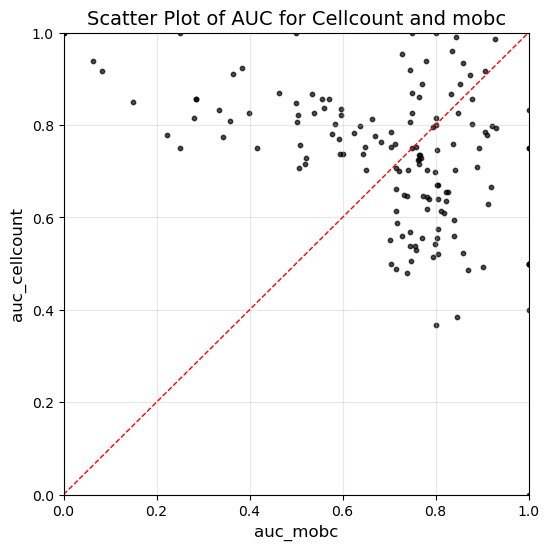

70 75


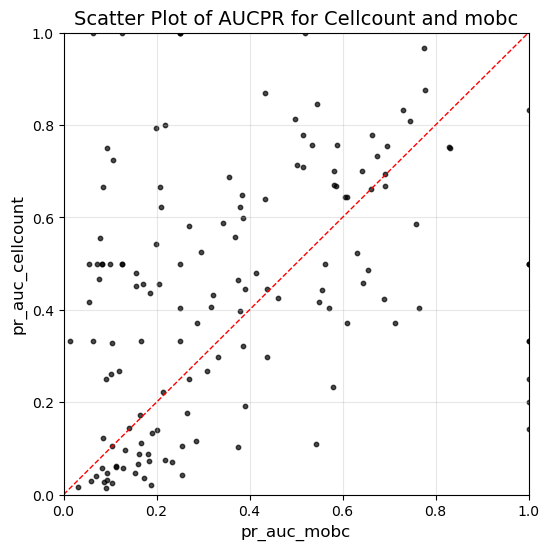

84 63


In [22]:
# Checking how many points are above and below the line x = y

df_above70 = df[(df["auc_mobc"]>=0.70) | (df["auc_cellcount"]>=0.70)]

# Creating the scatter plot to visualize the relationship between AUC mobc and AUC cellcount

plt.figure(figsize=(6, 6))

# Scatter plot
plt.scatter(df_above70['auc_mobc'], df_above70['auc_cellcount'], color='black', alpha=0.7, s=10)

plt.title('Scatter Plot of AUC for Cellcount and mobc', fontsize=14)
plt.xlabel('auc_mobc', fontsize=12)
plt.ylabel('auc_cellcount', fontsize=12)
plt.grid(alpha=0.3)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', linewidth=1, label='x=y')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()


above_line = (df_above70['auc_cellcount'] > df_above70['auc_mobc']).sum()
below_line = (df_above70['auc_cellcount'] < df_above70['auc_mobc']).sum()

print(above_line, below_line)



plt.figure(figsize=(6, 6))

# Scatter plot
plt.scatter(df_above70['pr_auc_mobc'], df_above70['pr_auc_cellcount'], color='black', alpha=0.7, s=10)

plt.title('Scatter Plot of AUCPR for Cellcount and mobc', fontsize=14)
plt.xlabel('pr_auc_mobc', fontsize=12)
plt.ylabel('pr_auc_cellcount', fontsize=12)
plt.grid(alpha=0.3)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', linewidth=1, label='x=y')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()
above_line = (df_above70['pr_auc_cellcount'] > df_above70['pr_auc_mobc']).sum()
below_line = (df_above70['pr_auc_cellcount'] < df_above70['pr_auc_mobc']).sum()

print(above_line, below_line)

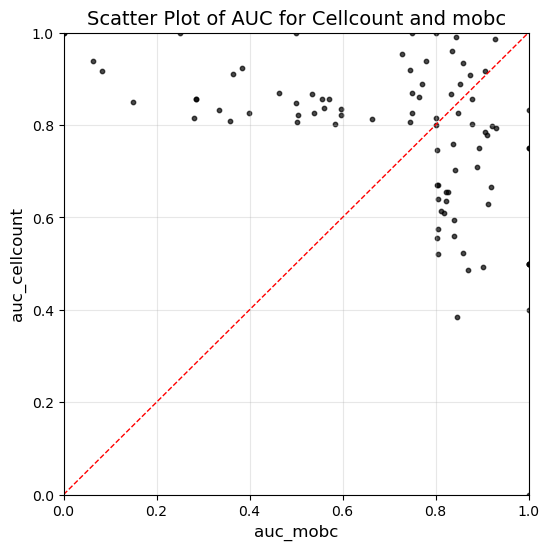

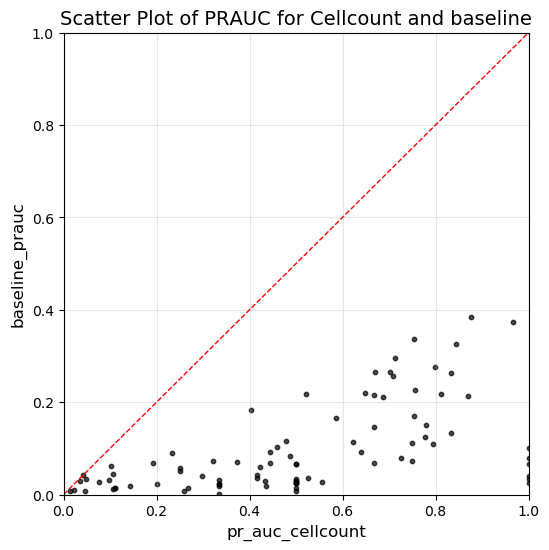

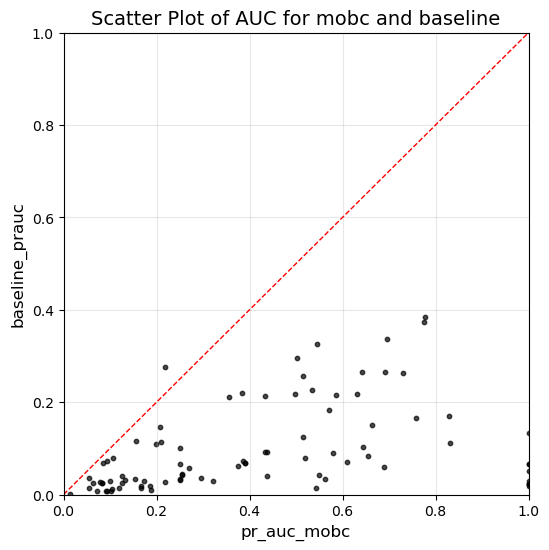

(47, 40)

In [13]:
# Checking how many points are above and below the line x = y

df_above80 = df[(df["auc_mobc"]>=0.80) | (df["auc_cellcount"]>=0.80)]

# Creating the scatter plot to visualize the relationship between AUC mobc and AUC cellcount

plt.figure(figsize=(6, 6))

# Scatter plot
plt.scatter(df_above80['auc_mobc'], df_above80['auc_cellcount'], color='black', alpha=0.7, s=10)

plt.title('Scatter Plot of AUC for Cellcount and mobc', fontsize=14)
plt.xlabel('auc_mobc', fontsize=12)
plt.ylabel('auc_cellcount', fontsize=12)
plt.grid(alpha=0.3)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', linewidth=1, label='x=y')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

plt.figure(figsize=(6, 6))

# Scatter plot
plt.scatter(df_above80['pr_auc_cellcount'], df_above80['baseline_prauc'], color='black', alpha=0.7, s=10)

plt.title('Scatter Plot of PRAUC for Cellcount and baseline', fontsize=14)
plt.xlabel('pr_auc_cellcount', fontsize=12)
plt.ylabel('baseline_prauc', fontsize=12)
plt.grid(alpha=0.3)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', linewidth=1, label='x=y')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()
plt.figure(figsize=(6, 6))

# Scatter plot
plt.scatter(df_above80['pr_auc_mobc'], df_above80['baseline_prauc'], color='black', alpha=0.7, s=10)

plt.title('Scatter Plot of AUC for mobc and baseline', fontsize=14)
plt.xlabel('pr_auc_mobc', fontsize=12)
plt.ylabel('baseline_prauc', fontsize=12)
plt.grid(alpha=0.3)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', linewidth=1, label='x=y')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()



above_line = (df_above80['auc_cellcount'] > df_above80['auc_mobc']).sum()
below_line = (df_above80['auc_cellcount'] < df_above80['auc_mobc']).sum()

above_line, below_line


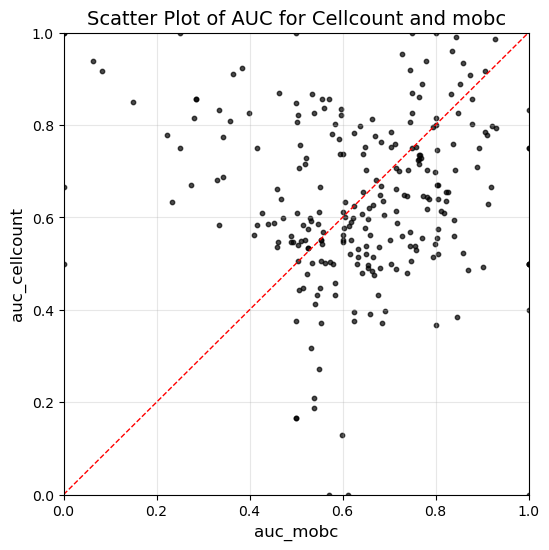

109 141


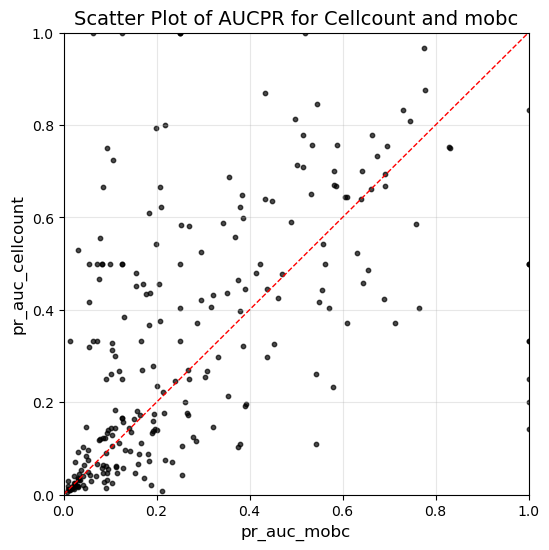

142 111


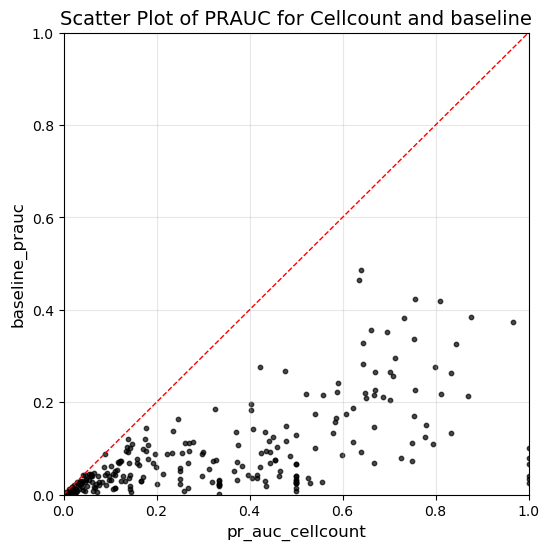

1 252


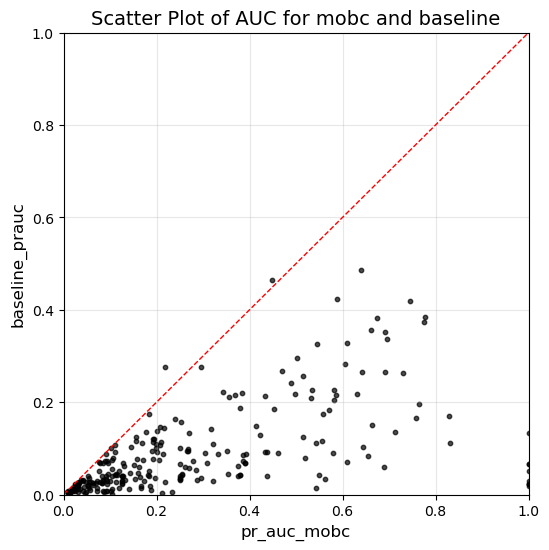

2 251


In [14]:
# Checking how many points are above and below the line x = y

df_above50 = df[(df["auc_mobc"]>=0.50) | (df["auc_cellcount"]>=0.50)]

# Creating the scatter plot to visualize the relationship between AUC mobc and AUC cellcount

plt.figure(figsize=(6, 6))

# Scatter plot
plt.scatter(df_above50['auc_mobc'], df_above50['auc_cellcount'], color='black', alpha=0.7, s=10)

plt.title('Scatter Plot of AUC for Cellcount and mobc', fontsize=14)
plt.xlabel('auc_mobc', fontsize=12)
plt.ylabel('auc_cellcount', fontsize=12)
plt.grid(alpha=0.3)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', linewidth=1, label='x=y')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

above_line = (df_above50['auc_cellcount'] > df_above50['auc_mobc']).sum()
below_line = (df_above50['auc_cellcount'] < df_above50['auc_mobc']).sum()

print(above_line, below_line)


plt.figure(figsize=(6, 6))

# Scatter plot
plt.scatter(df_above50['pr_auc_mobc'], df_above50['pr_auc_cellcount'], color='black', alpha=0.7, s=10)

plt.title('Scatter Plot of AUCPR for Cellcount and mobc', fontsize=14)
plt.xlabel('pr_auc_mobc', fontsize=12)
plt.ylabel('pr_auc_cellcount', fontsize=12)
plt.grid(alpha=0.3)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', linewidth=1, label='x=y')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()
above_line = (df_above50['pr_auc_cellcount'] > df_above50['pr_auc_mobc']).sum()
below_line = (df_above50['pr_auc_cellcount'] < df_above50['pr_auc_mobc']).sum()

print(above_line, below_line)


plt.figure(figsize=(6, 6))

# Scatter plot
plt.scatter(df_above50['pr_auc_cellcount'], df_above50['baseline_prauc'], color='black', alpha=0.7, s=10)

plt.title('Scatter Plot of PRAUC for Cellcount and baseline', fontsize=14)
plt.xlabel('pr_auc_cellcount', fontsize=12)
plt.ylabel('baseline_prauc', fontsize=12)
plt.grid(alpha=0.3)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', linewidth=1, label='x=y')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

above_line = (df_above50['baseline_prauc'] > df_above50['pr_auc_cellcount']).sum()
below_line = (df_above50['baseline_prauc'] < df_above50['pr_auc_cellcount']).sum()

print(above_line, below_line)

plt.figure(figsize=(6, 6))

# Scatter plot
plt.scatter(df_above50['pr_auc_mobc'], df_above50['baseline_prauc'], color='black', alpha=0.7, s=10)

plt.title('Scatter Plot of AUC for mobc and baseline', fontsize=14)
plt.xlabel('pr_auc_mobc', fontsize=12)
plt.ylabel('baseline_prauc', fontsize=12)
plt.grid(alpha=0.3)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', linewidth=1, label='x=y')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()


above_line = (df_above50['baseline_prauc'] > df_above50['pr_auc_mobc']).sum()
below_line = (df_above50['baseline_prauc'] < df_above50['pr_auc_mobc']).sum()

print(above_line, below_line)


In [15]:
df_above50.mean()

assay_id                   inf
auc_mobc              0.637152
AP                    0.329535
pr_auc_mobc           0.276412
Fold                  2.000000
auc_cellcount         0.639634
pr_auc_cellcount      0.327525
Test_Set_Length     456.508300
Num_Actives          12.467984
Num_Inactives       444.040316
baseline_prauc        0.088360
dtype: float64

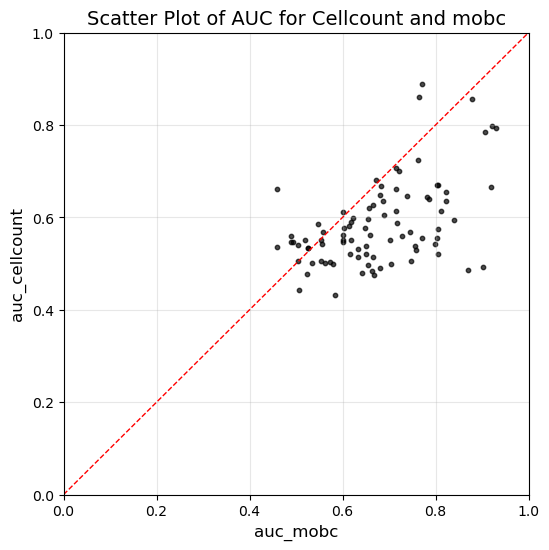

16 72


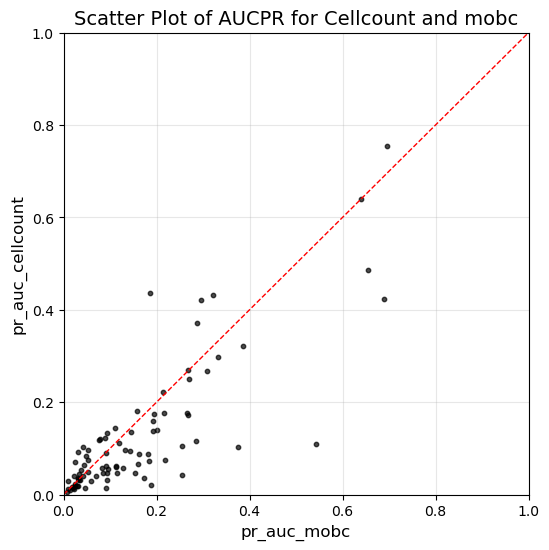

29 59


In [16]:
# Checking how many points are above and below the line x = y

df_condition = df_above50[df_above50["Num_Actives"]>=5]

plt.figure(figsize=(6, 6))

# Scatter plot
plt.scatter(df_condition['auc_mobc'], df_condition['auc_cellcount'], color='black', alpha=0.7, s=10)

plt.title('Scatter Plot of AUC for Cellcount and mobc', fontsize=14)
plt.xlabel('auc_mobc', fontsize=12)
plt.ylabel('auc_cellcount', fontsize=12)
plt.grid(alpha=0.3)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', linewidth=1, label='x=y')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

above_line = (df_condition['auc_cellcount'] > df_condition['auc_mobc']).sum()
below_line = (df_condition['auc_cellcount'] < df_condition['auc_mobc']).sum()

print(above_line, below_line)

plt.figure(figsize=(6, 6))

# Scatter plot
plt.scatter(df_condition['pr_auc_mobc'], df_condition['pr_auc_cellcount'], color='black', alpha=0.7, s=10)

plt.title('Scatter Plot of AUCPR for Cellcount and mobc', fontsize=14)
plt.xlabel('pr_auc_mobc', fontsize=12)
plt.ylabel('pr_auc_cellcount', fontsize=12)
plt.grid(alpha=0.3)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', linewidth=1, label='x=y')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

above_line = (df_condition['pr_auc_cellcount'] > df_condition['pr_auc_mobc']).sum()
below_line = (df_condition['pr_auc_cellcount'] < df_condition['pr_auc_mobc']).sum()

print(above_line, below_line)


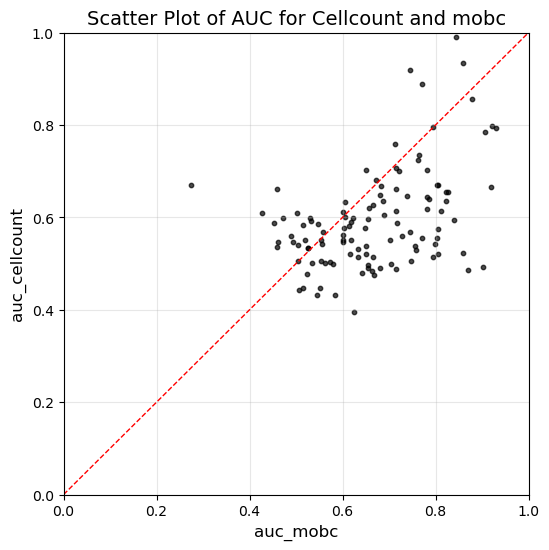

30 84


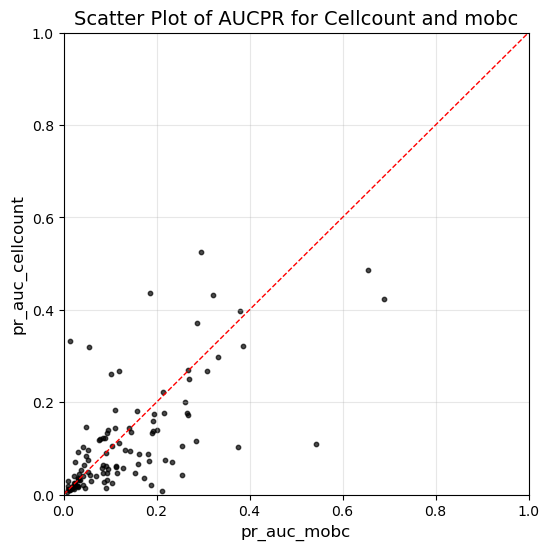

41 73


In [17]:
# Checking how many points are above and below the line x = y

df_condition = df_above50[df_above50["Test_Set_Length"]>=30]

plt.figure(figsize=(6, 6))

# Scatter plot
plt.scatter(df_condition['auc_mobc'], df_condition['auc_cellcount'], color='black', alpha=0.7, s=10)

plt.title('Scatter Plot of AUC for Cellcount and mobc', fontsize=14)
plt.xlabel('auc_mobc', fontsize=12)
plt.ylabel('auc_cellcount', fontsize=12)
plt.grid(alpha=0.3)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', linewidth=1, label='x=y')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

above_line = (df_condition['auc_cellcount'] > df_condition['auc_mobc']).sum()
below_line = (df_condition['auc_cellcount'] < df_condition['auc_mobc']).sum()

print(above_line, below_line)


plt.figure(figsize=(6, 6))
# Scatter plot
plt.scatter(df_condition['pr_auc_mobc'], df_condition['pr_auc_cellcount'], color='black', alpha=0.7, s=10)

plt.title('Scatter Plot of AUCPR for Cellcount and mobc', fontsize=14)
plt.xlabel('pr_auc_mobc', fontsize=12)
plt.ylabel('pr_auc_cellcount', fontsize=12)
plt.grid(alpha=0.3)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', linewidth=1, label='x=y')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

above_line = (df_condition['pr_auc_cellcount'] > df_condition['pr_auc_mobc']).sum()
below_line = (df_condition['pr_auc_cellcount'] < df_condition['pr_auc_mobc']).sum()

print(above_line, below_line)

In [18]:
# Find maximum AUCPR for CellCount and Random_AUCPR per task
cellcount_random_max = df.groupby(["assay_id", "Fold"])[["pr_auc_cellcount", "baseline_prauc"]].max()
cellcount_random_max["Max_CellCount_Random_AUCPR"] = cellcount_random_max[["pr_auc_cellcount", "baseline_prauc"]].max(axis=1)

# Merge the maximum CellCount/Random_AUCPR back with CellProfiler data
cellprofiler_df = df.merge(cellcount_random_max["Max_CellCount_Random_AUCPR"], on=["assay_id", "Fold"])

# Compare CellProfiler AUCPR with the max of CellCount/Random_AUCPR for each task
cellprofiler_df["Better_AUCPR"] = cellprofiler_df["pr_auc_mobc"] >= cellprofiler_df["Max_CellCount_Random_AUCPR"]

# Count how many times CellProfiler AUCPR is better per task
better_aucpr_counts_corrected = cellprofiler_df.groupby("assay_id")["Better_AUCPR"].sum()

better_aucpr_counts_corrected


assay_id
100_277    0
100_278    0
104_289    0
104_291    0
104_295    0
          ..
92_258     0
93_259     0
9_14       1
9_17       0
9_18       0
Name: Better_AUCPR, Length: 270, dtype: int64

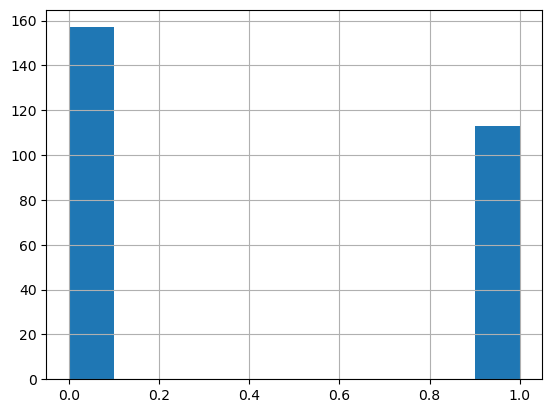

In [19]:
better_aucpr_counts_corrected.hist()
plt.show()

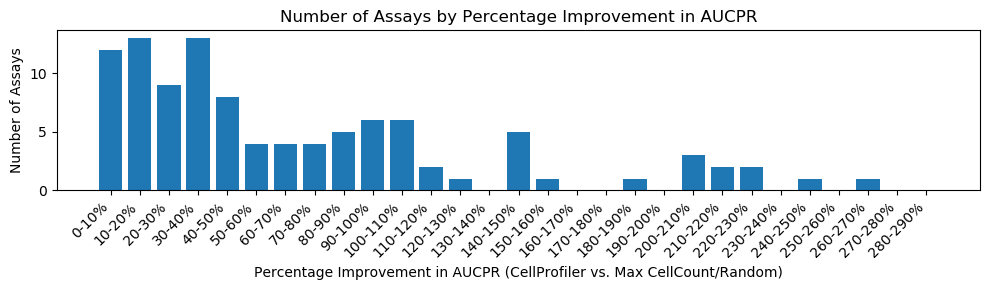

In [20]:
import matplotlib.pyplot as plt

# Calculate percentage improvement for CellProfiler AUCPR compared to max of CellCount/Random AUCPR
cellprofiler_df["Percentage_Improvement"] = (
    (cellprofiler_df["pr_auc_mobc"] - cellprofiler_df["Max_CellCount_Random_AUCPR"]) / cellprofiler_df["Max_CellCount_Random_AUCPR"]
) * 100


cellprofiler_df = cellprofiler_df.groupby("assay_id").median().reset_index()

# Bin percentage improvement into ranges
bins = range(0, 300, 10)  # Define bins from -50% to 100% in increments of 10%
cellprofiler_df["Improvement_Bin"] = pd.cut(cellprofiler_df["Percentage_Improvement"], bins)

# Count the number of assays in each bin
improvement_counts = cellprofiler_df["Improvement_Bin"].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 3))
plt.bar(
    [f"{int(interval.left)}-{int(interval.right)}%" for interval in improvement_counts.index],
    improvement_counts.values,
)
plt.xlabel("Percentage Improvement in AUCPR (CellProfiler vs. Max CellCount/Random)")
plt.ylabel("Number of Assays")
plt.title("Number of Assays by Percentage Improvement in AUCPR")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


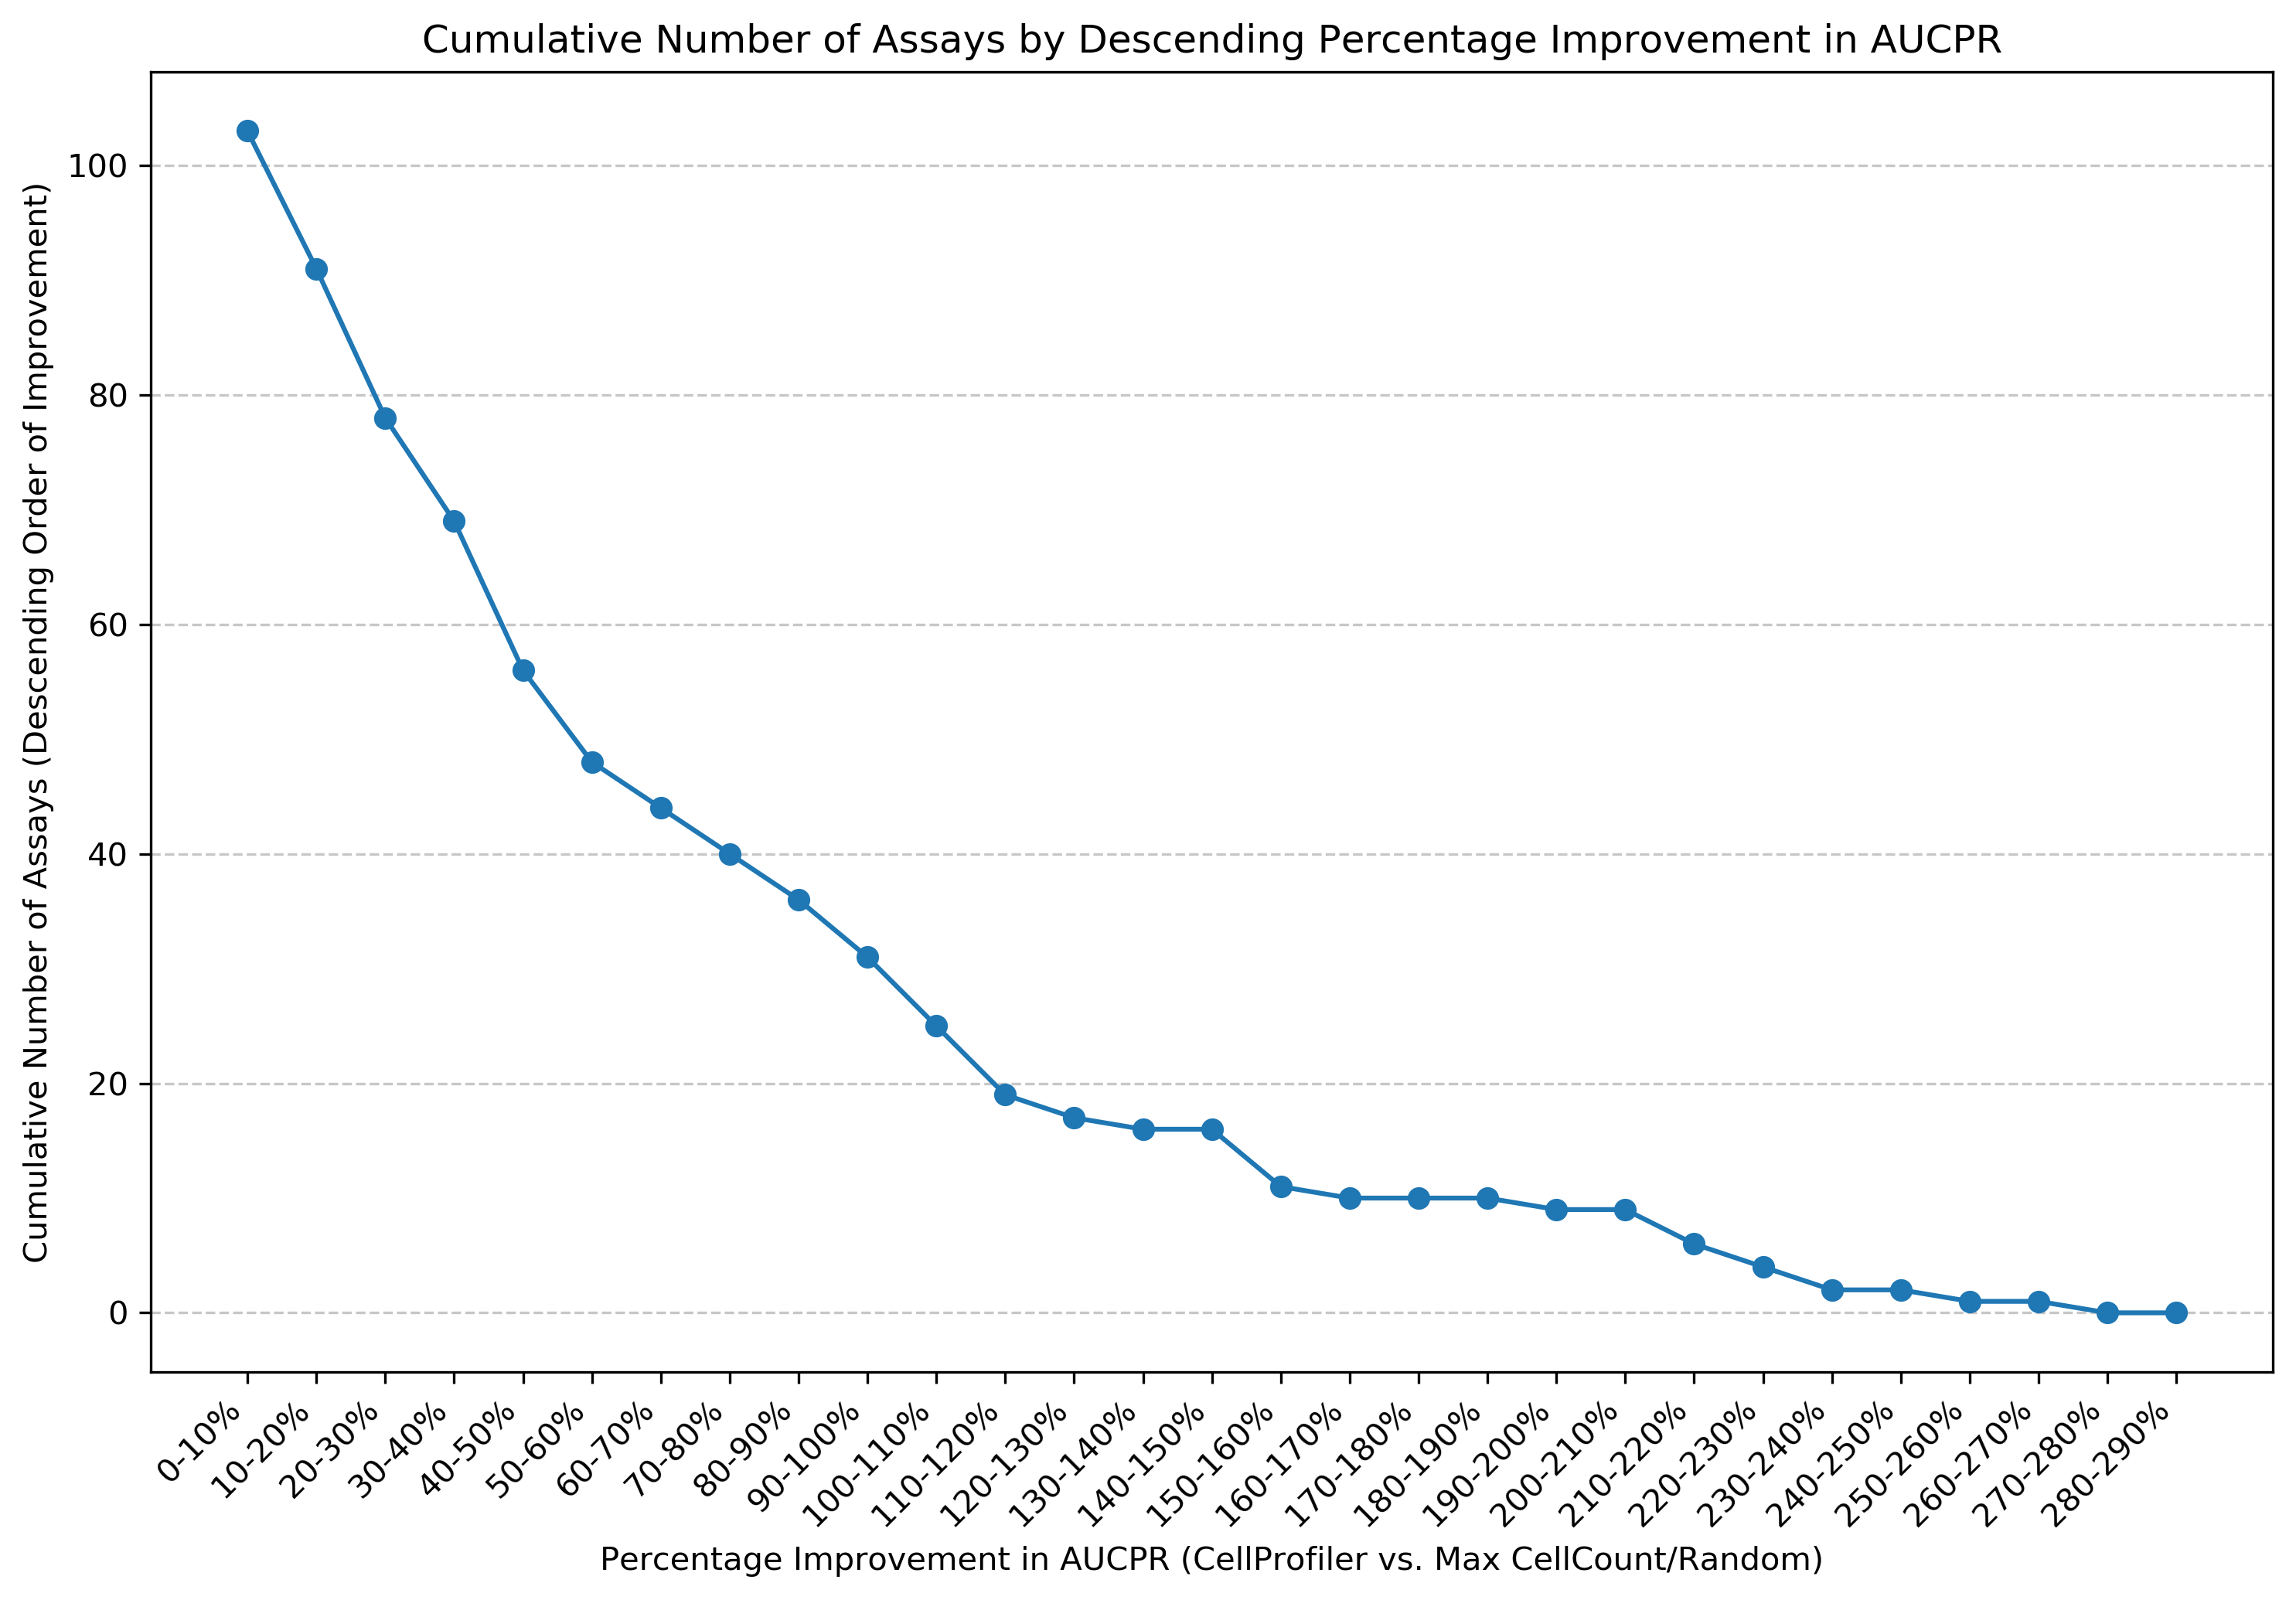

In [21]:
# Sort data for cumulative count starting from highest percentage improvement (100% to 0%)
reverse_cumulative_improvement = improvement_counts[::-1].cumsum()

# Line plot for reverse cumulative count of assays
plt.figure(figsize=(10, 7), dpi=300)
plt.plot(
    [f"{int(interval.left)}-{int(interval.right)}%" for interval in reverse_cumulative_improvement.index][::-1],
    reverse_cumulative_improvement.values[::-1],
    marker='o',
    linestyle='-'
)
plt.xlabel("Percentage Improvement in AUCPR (CellProfiler vs. Max CellCount/Random)")
plt.ylabel("Cumulative Number of Assays (Descending Order of Improvement)")
plt.title("Cumulative Number of Assays by Descending Percentage Improvement in AUCPR")
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
